In [2]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\aanishsingla\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
messages = [ line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [11]:
print(len(messages))

5574


In [13]:
messages[3]

'ham\tU dun say so early hor... U c already then say...'

In [15]:
import pandas as pd

In [17]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','msg'])

In [24]:
messages.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
messages.groupby('label').describe()

msg                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [26]:
messages['length'] = messages['msg'].apply(len)

In [27]:
messages.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
%matplotlib inline 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010AF4198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010EE0898>], dtype=object)

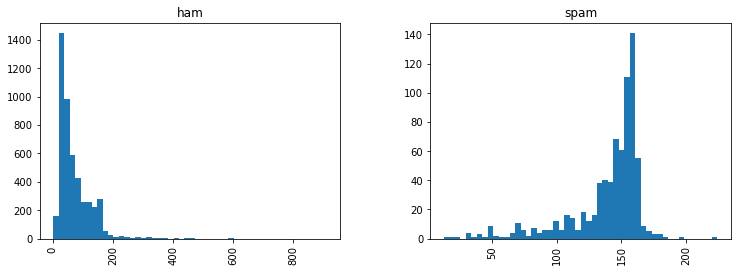

In [38]:
messages.hist(column='length',by='label',bins=50,figsize=(12,4))

In [39]:
import string

In [40]:
from nltk.corpus import stopwords

In [41]:
stopwords.words('english')

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're",
 u"you've",
 u"you'll",
 u"you'd",
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u"she's",
 u'her',
 u'hers',
 u'herself',
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u"that'll",
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'th

In [55]:
mess = "Hi! how are you?"

In [56]:
mess = [c for c in mess if c not in string.punctuation]

In [57]:
mess

['H', 'i', ' ', 'h', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u']

In [58]:
mess = ''.join(mess)

In [59]:
mess

'Hi how are you'

In [60]:
mess = mess.split()

In [61]:
mess

['Hi', 'how', 'are', 'you']

In [63]:
new_mess = [c for c in mess if c not in stopwords.words('english')]

In [80]:
new_mess

['Hi']

In [81]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [113]:
def token(mess):
    """
    1. Remove punc
    2. Remove stopwords
    3. Stemming
    Returns list of words
    """
    nopunct = [char for char in mess if char not in string.punctuation]
    
    nopunct = ''.join(nopunct)
    
    stp_words = [char for char in nopunct.split() if char.lower() not in stopwords.words('english')]
    
    ps = PorterStemmer()
    
    return [ps.stem(i.decode('utf-8')) for i in stp_words]

In [115]:
print(messages['msg'].head(10).apply(token))

0    [Go, jurong, point, crazi, avail, bugi, n, gre...
1                         [Ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, FA, cup, fin...
3        [U, dun, say, earli, hor, U, c, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
5    [freemsg, hey, darl, 3, week, word, back, Id, ...
6    [even, brother, like, speak, treat, like, aid,...
7    [per, request, mell, mell, oru, minnaminungint...
8    [winner, valu, network, custom, select, receiv...
9    [mobil, 11, month, U, R, entitl, updat, latest...
Name: msg, dtype: object


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if sys.path[0] == '':


In [116]:
from sklearn.feature_extraction.text import CountVectorizer

In [117]:
bow_tx = CountVectorizer(analyzer=token).fit(messages['msg'])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if sys.path[0] == '':


In [118]:
print(len(bow_tx.vocabulary_))

8309


In [138]:
messages_bow = bow_tx.transform(messages['msg'])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if sys.path[0] == '':


In [120]:
messages_bow.shape

(5572, 8309)

In [121]:
messages_bow.nnz

49934

In [123]:
messages_bow.sum()

52720

In [124]:
5572*8309

46297748

In [125]:
from sklearn.feature_extraction.text import TfidfTransformer

In [126]:
tfidf = TfidfTransformer().fit(messages_bow)

In [146]:
mess_tfidf = tfidf.transform(messages_bow)

In [147]:
from sklearn.naive_bayes import MultinomialNB

In [148]:
nb_model = MultinomialNB().fit(mess_tfidf, messages['label'])

In [150]:
pred = nb_model.predict(mess_tfidf)

In [152]:
import collections

In [153]:
collections.Counter(pred)

Counter({'ham': 4951, 'spam': 621})

In [154]:
collections.Counter(messages['label'])

Counter({'ham': 4825, 'spam': 747})